In [32]:
import importlib

import dataset, metrics, plotting, config, network
from models import cgan_model
import numpy as np
import random

importlib.reload(network)
importlib.reload(dataset)
importlib.reload(metrics)
importlib.reload(plotting)
importlib.reload(config)
importlib.reload(cgan_model)

<module 'models.cgan_model' from '/Users/zhongsheng/Documents/GitWorkspace/ganRegression/models/cgan_model.py'>

In [33]:
import os

dataset_config = config.DatasetConfig(scenario="hdpe")

assert(dataset_config.scenario == "CA-housing"
      or dataset_config.scenario == "ailerons"
      or dataset_config.scenario == "CA-housing-single"
      or dataset_config.scenario == "comp-activ"
      or dataset_config.scenario == "pumadyn"
      or dataset_config.scenario == "bank"
      or dataset_config.scenario == "abalone"
      or dataset_config.scenario == "census-house"
      or dataset_config.scenario == "hdpe")
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")

Directory ../figures/hdpe already exists replacing files in this notebook


In [34]:
random_seed = 1992

if dataset_config.scenario == "CA-housing" or dataset_config.scenario == "CA-housing-single":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.0001, lr_disc=0.001, dec_gen=0, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=20, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )
    
elif dataset_config.scenario == "ailerons":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.0001, lr_disc=0.0005, dec_gen=0, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )
    
elif dataset_config.scenario == "comp-activ":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.005, lr_disc=0.001, dec_gen=0.0001, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )
    
elif dataset_config.scenario == "pumadyn":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.001, lr_disc=0.001, dec_gen=0.001, dec_disc=0.001, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )
    
elif dataset_config.scenario == "bank":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.001, lr_disc=0.001, dec_gen=0.001, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )
    
elif dataset_config.scenario == "abalone":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.001, lr_disc=0.001, dec_gen=0.001, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )
    
elif dataset_config.scenario == "census-house":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.001, lr_disc=0.001, dec_gen=0.0001, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )

elif dataset_config.scenario == "hdpe":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.001, lr_disc=0.001, dec_gen=0.0001, dec_disc=0,
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=20, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )


In [35]:
# Set random seed
np.random.seed(exp_config.model.random_seed)
random.seed(exp_config.model.random_seed)

from tensorflow import set_random_seed
set_random_seed(exp_config.model.random_seed)

In [36]:
X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(scenario=exp_config.dataset.scenario, 
                                                                         seed=exp_config.model.random_seed)

In [37]:
X_train.shape, len(X_valid), len(X_test)

((67, 15), 34, 34)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# GAN

In [39]:
cgan = cgan_model.CGAN(exp_config)
d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true = cgan.train(X_train_scaled, y_train, 
                                                                              epochs=exp_config.training.n_epochs,
                                                                              batch_size=exp_config.training.batch_size)

ypred_gan_test = cgan.predict(X_test_scaled)

/Users/zhongsheng/anaconda2/envs/ganRegression/lib/python3.6/site-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 0 / dLoss: 1.65156888961792 / gLoss: 0.23636789619922638
Epoch: 1 / dLoss: 0.5412917137145996 / gLoss: 2.8299107551574707
Epoch: 2 / dLoss: 0.6928508281707764 / gLoss: 1.453298807144165
Epoch: 3 / dLoss: 0.5767819881439209 / gLoss: 0.9284845590591431
Epoch: 4 / dLoss: 0.6511238813400269 / gLoss: 1.463792324066162
Epoch: 5 / dLoss: 0.6726608276367188 / gLoss: 1.1195296049118042
Epoch: 6 / dLoss: 0.6733384728431702 / gLoss: 0.7262446880340576
Epoch: 7 / dLoss: 0.5089893341064453 / gLoss: 1.7343721389770508
Epoch: 8 / dLoss: 0.6635681986808777 / gLoss: 0.792194664478302
Epoch: 9 / dLoss: 0.6461507081985474 / gLoss: 0.8150922656059265
Epoch: 10 / dLoss: 0.6162903308868408 / gLoss: 0.8338650465011597
Epoch: 11 / dLoss: 0.6218554973602295 / gLoss: 0.9180472493171692
Epoch: 12 / dLoss: 0.6032882928848267 / gLoss: 0.8359639048576355
Epoch: 13 / dLoss: 0.6256046295166016 / gLoss: 0.672289252281189
Epoch: 14 / dLoss: 0.6278384923934937 / gLoss: 1.3642354011535645
Epoch: 15 / dLoss: 0.5812

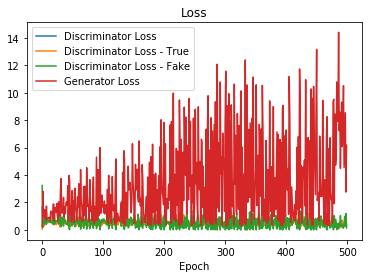

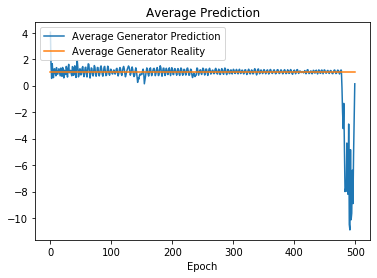

In [40]:
plotting.plots(d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true, fig_dir, exp_config.run.save_fig)

In [43]:
ypred_mean_gan_test, ypred_median_gan_test, ypred_gan_sample_test = cgan.sample(X_test_scaled, 
                                                                                exp_config.training.n_samples)

In [44]:
ypred_mean_gan_train, ypred_median_gan_train, ypred_gan_sample_train = cgan.sample(X_train_scaled, 
                                                                                   exp_config.training.n_samples)

# NN

In [45]:
import keras

dropout_rate = 0.1

# Comparable architecture to GAN 
model = keras.models.Sequential([
    keras.layers.Dense(500, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dropout(dropout_rate), 
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dropout(dropout_rate), 
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(1, activation="linear"),
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(lr=0.001, decay=0.1))

W0509 11:34:59.879842 4487802304 deprecation.py:506] From /Users/zhongsheng/anaconda2/envs/ganRegression/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [46]:
callbacks = [keras.callbacks.EarlyStopping(patience=10)]
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid), epochs=100,
                    callbacks=callbacks)

Train on 67 samples, validate on 34 samples
Epoch 1/100
67/67 [==============================] - 1s 13ms/step - loss: 1.0305 - val_loss: 0.3511
Epoch 2/100
67/67 [==============================] - 0s 293us/step - loss: 0.2518 - val_loss: 0.1512
Epoch 3/100
67/67 [==============================] - 0s 299us/step - loss: 0.4871 - val_loss: 0.0736
Epoch 4/100
67/67 [==============================] - 0s 324us/step - loss: 0.1603 - val_loss: 0.0659
Epoch 5/100
67/67 [==============================] - 0s 304us/step - loss: 0.1272 - val_loss: 0.1245
Epoch 6/100
67/67 [==============================] - 0s 293us/step - loss: 0.1198 - val_loss: 0.1228
Epoch 7/100
67/67 [==============================] - 0s 363us/step - loss: 0.1190 - val_loss: 0.0801

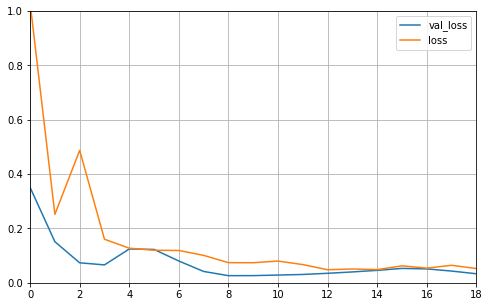

In [47]:
plotting.plot_learning_curves(history)

In [48]:
ypred_nn_test = model.predict(X_test_scaled)

# GP

In [51]:
import GPy

run_hyperopt_search = True
rbf = True
variance = 0.1
length = 0.5
noise_var = exp_config.model.z_input_size
if rbf:
    kernel = GPy.kern.RBF(input_dim=cgan.x_input_size, variance=variance, lengthscale=length)
else:
    kernel = GPy.kern.sde_RatQuad(input_dim=X_train_scaled.shape[1], variance=variance, lengthscale=length, power=power)

gpr = GPy.models.GPRegression(X_train_scaled, y_train.reshape(-1, 1), kernel, noise_var=noise_var)

if run_hyperopt_search:
    gpr.optimize(messages=True)

In [52]:
ypred_gp_test, cov_test = gpr.predict(X_test_scaled)

# Plots

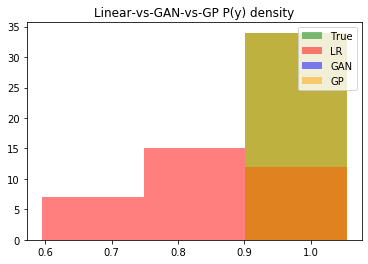

In [53]:
# plotting.plot_densities_joint(y_test, ypred_nn_test, ypred_mean_gan_test, ypred_gp_test, 
#                              "Linear-vs-GAN-vs-GP P(y) density", fig_dir=fig_dir, 
#                              prefix="all_marginalized", save_fig=exp_config.run.save_fig, at_x=True)

plotting.plot_datadistrib_joint(y_test, ypred_nn_test, ypred_mean_gan_test, ypred_gp_test, 
                                "Linear-vs-GAN-vs-GP P(y) density", fig_dir=fig_dir, 
                                prefix="all_marginalized", save_fig=exp_config.run.save_fig)

# Metrics

In [54]:
n_eval_runs = 10

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse_gan_= []
mae_gan_ = []
for i in range(n_eval_runs):
    ypred_mean_gan_test_, ypred_median_gan_test_, _ = cgan.sample(X_test_scaled, exp_config.training.n_samples)
    mae_gan_.append(mean_absolute_error(y_test, ypred_median_gan_test_))
    mse_gan_.append(mean_squared_error(y_test, ypred_mean_gan_test_))

In [56]:
nn_mae = mean_absolute_error(ypred_nn_test, y_test)
gp_mae = mean_absolute_error(ypred_gp_test, y_test)
gan_mae_mean = np.mean(np.asarray(mae_gan_))
gan_mae_std = np.std(np.asarray(mae_gan_))

print(f"NN MAE test: {nn_mae}")
print(f"GP MAE test: {gp_mae}")
print(f"GAN MAE test: {gan_mae_mean} +- {gan_mae_std}")

NN MAE test: 0.15830983883936264
GP MAE test: 0.0002921978523157251
GAN MAE test: 0.16894062155510398 +- 0.000534226793418566


In [57]:
nn_mse = mean_squared_error(ypred_nn_test, y_test)
gp_mse = mean_squared_error(ypred_gp_test, y_test)
gan_mse_mean = np.mean(np.asarray(mse_gan_))
gan_mse_std = np.std(np.asarray(mse_gan_))
# mdn_mse_mean = np.mean(np.asarray(mse_mdn_))
# mdn_mse_std = np.std(np.asarray(mse_mdn_))

print(f"NN MSE test: {nn_mse}")
print(f"GP MSE test: {gp_mse}")
print(f"GAN MSE test: {gan_mse_mean} +- {gan_mse_std}")
# print(f"MDN MSE test: {mdn_mse_mean} +- {mdn_mse_std}")

NN MSE test: 0.0369848727158702
GP MSE test: 1.2561815699761658e-07
GAN MSE test: 13.51035365640941 +- 2.9435455066161755


In [59]:
cov_nn = np.mean((y_test - ypred_nn_test)**2)
nn_nlpd = metrics.gaussian_NLPD(y_test, ypred_nn_test, np.ones(len(ypred_nn_test)) * cov_nn, "NN")

NN Gaussian NLPD: -0.22967321553145612


In [60]:
gp_nlpd = metrics.gaussian_NLPD(y_test, ypred_gp_test, cov_test, "GP")

GP Gaussian NLPD: -5.873658469572845


In [61]:
gan_nlpd_train, w, lls = metrics.Parzen(cgan, X_valid_scaled, y_valid, n_sample=exp_config.training.n_samples)
nlpd_ = []
for i in range(n_eval_runs):
    nlpd_.append(metrics.Parzen_test(cgan, X_test_scaled, y_test, w, exp_config.training.n_samples))
gan_nlpd_test = np.mean(nlpd_)
gan_nlpd_std_test = np.std(nlpd_)

print(f"GAN Train NLLH: {gan_nlpd_train}")
print(f"GAN Test NLLH: mean {gan_nlpd_test} std {gan_nlpd_std_test}")

GAN Train NLLH: -0.27970799418200876
GAN Test NLLH: mean -0.3059583383425306 std 0.004649285624142285


In [62]:
if exp_config.run.save_fig:
    file = open(f"{fig_dir}/metrics.txt","w") 

    file.write(f"===Test MAE===\n")
    file.write(f"NN MAE test: {nn_mae}\n") 
    file.write(f"GP MAE test: {gp_mae}\n")
    file.write(f"GAN MAE test: {gan_mae_mean} +- {gan_mae_std}\n")
    file.write(f"===Test MSE===\n")
    file.write(f"NN MSE test: {nn_mse}\n")
    file.write(f"GP MSE test: {gp_mse}\n")
    file.write(f"GAN MSE test: {gan_mse_mean} +- {gan_mse_std}\n")
    file.write(f"===Test NLPD===\n")
    file.write(f"NN Gaussian NLPD: {nn_nlpd}\n")
    file.write(f"GP Gaussian NLPD: {gp_nlpd}\n")
    file.write(f"GAN NLPD: {gan_nlpd_test} +- {gan_nlpd_std_test}\n")
    file.close() 